In [2]:
import tensorflow as tf

In [10]:
print(tf.__version__)

2.11.0


In [4]:
#print(tf.config.experimental.list_physical_devices(device_type="GPU"))


[]


In [6]:
# Sample from whole dataset

import os 
import shutil
from PIL import Image
import numpy as np

images = os.listdir('/projects/rkraig/2019-600 images') # list of all the images
n_test_images = int(len(images) * 0.1) # 10% of the total images

subset_images = np.random.choice(images, size=n_test_images, replace=True)


In [8]:
subset_images

array(['000000083999[1].jpg', '000000102999[1].jpg',
       '000000083866[1].jpg', '000000077276[1].jpg',
       '000000103075[1].jpg', '000000109742[1].jpg',
       '000000071093[1].jpg', '000000109539[1].jpg',
       '000000077521[1].jpg', '000000070978[1].jpg',
       '000000064560[1].jpg', '000000109760[1].jpg',
       '000000083812[1].jpg', '000000077360[1].jpg',
       '000000090440[1].jpg', '000000083909[1].jpg',
       '000000103144[1].jpg', '000000096608[1].jpg',
       '000000109543[1].jpg', '000000077576[1].jpg',
       '000000083728[1].jpg', '000000064610[1].jpg',
       '000000077387[1].jpg', '000000070995[1].jpg',
       '000000070992[1].jpg', '000000096656[1].jpg',
       '000000090416[1].jpg', '000000070904[1].jpg',
       '000000103132[1].jpg', '000000109486[1].jpg',
       '000000077268[1].jpg', '000000077249[1].jpg',
       '000000115886[1].jpg', '000000083784[1].jpg',
       '000000096569[1].jpg', '000000083921[1].jpg',
       '000000103132[1].jpg', '000000109471[1]

### Pre-processing for a single image

Dimensions of the image:  3
Image height:  1080
Image width:  1920
Image channels:  3
Size of the image array:  6220800


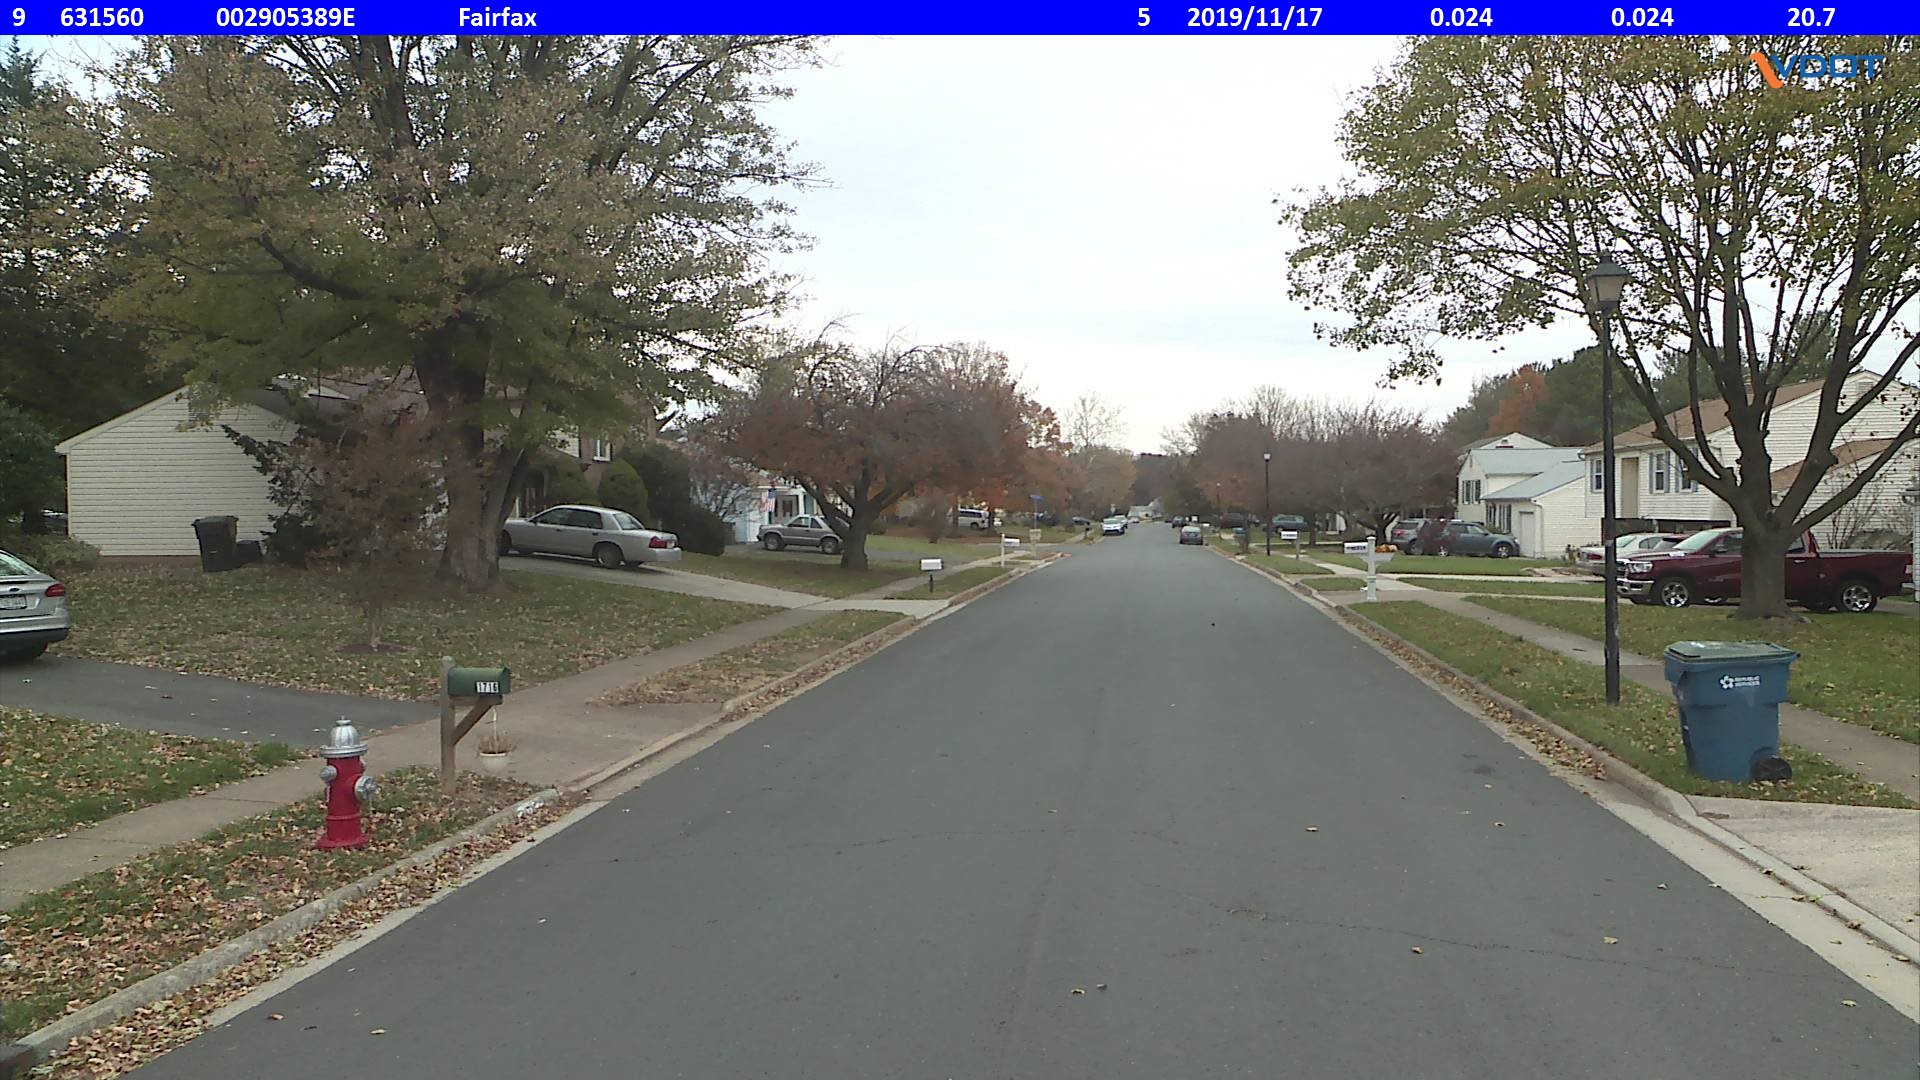

In [13]:
#%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt
import shutil
from PIL import Image
import os

# image path
image_path = "/projects/rkraig/phoenix_venv/onedrive/000000051643[1].jpg"

# Read or load image from its path
image = cv2.imread(image_path)
# image is a NumPy array
print("Dimensions of the image: ", image.ndim) 
print("Image height: ", format(image.shape[0])) 
print("Image width: ", format(image.shape[1])) 
print("Image channels: ", format(image.shape[2]))  
print("Size of the image array: ", image.size) 
# Display the image and wait until a key is pressed 

img = Image.open(imgPath)
img.show()



#Show the image with matplotlib
#plt.imshow(image)
#plt.show()


Dimensions of the image:  3
Image height:  720
Image width:  1920
Image channels:  3
Size of the image array:  4147200
(720, 1920, 3)


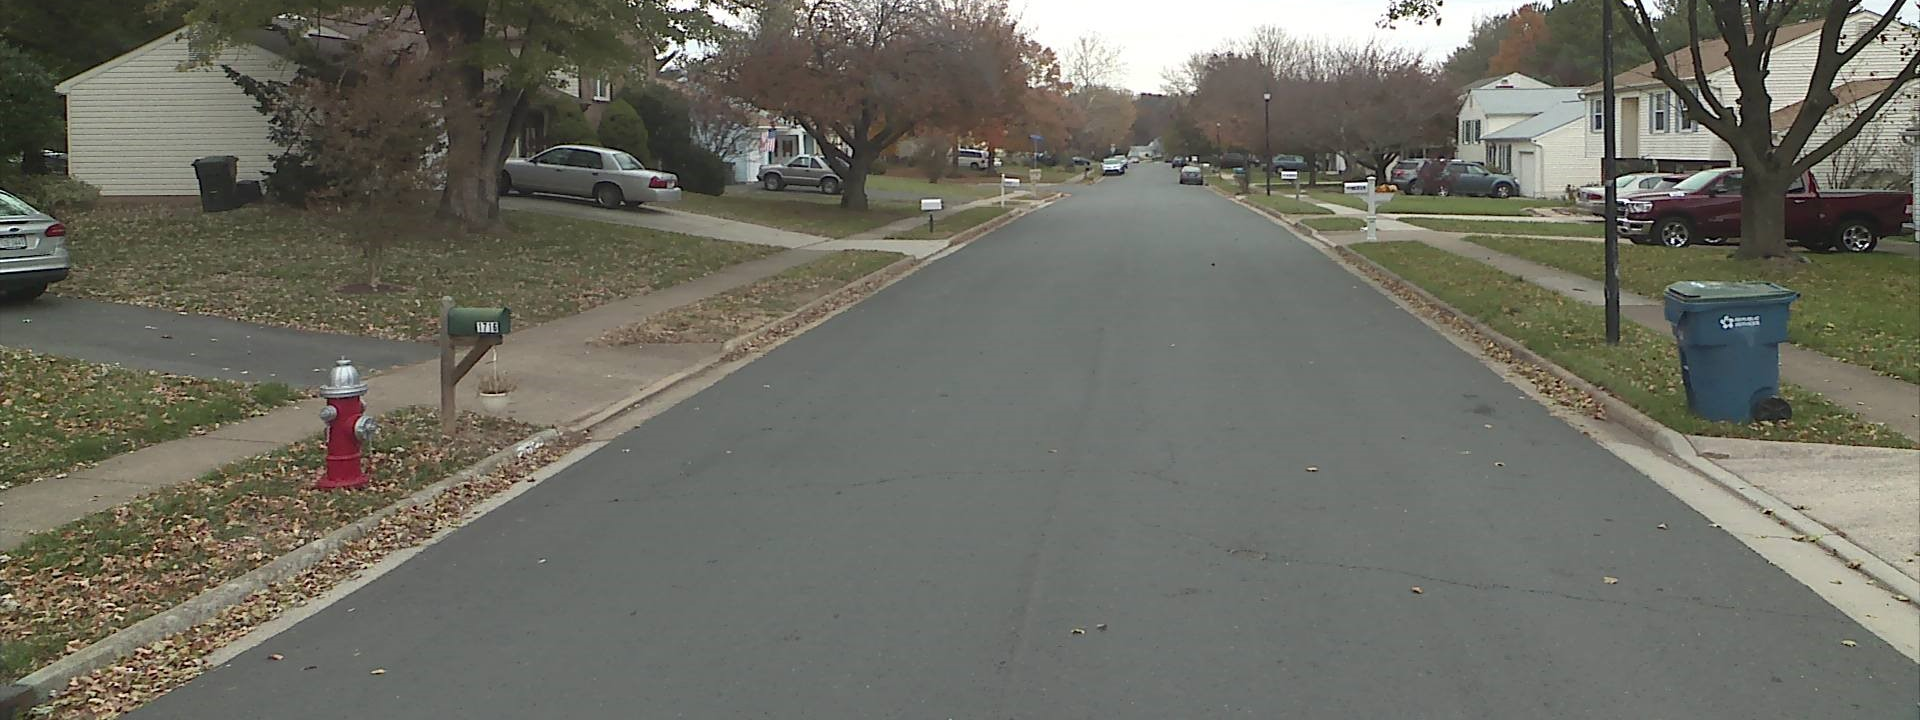

In [17]:
import numpy as np

# Remove the top portion of each image.
img_crop = img.crop((0, 360, 1920, 1080))
image=np.array(img_crop) 

# image is a NumPy array
print("Dimensions of the image: ", image.ndim) 
print("Image height: ", format(image.shape[0])) 
print("Image width: ", format(image.shape[1])) 
print("Image channels: ", format(image.shape[2]))  
print("Size of the image array: ", image.size)
print(image.shape)
img_crop.show()


In [ ]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
import cv2
from matplotlib import pyplot as plt
import numpy as np
# Create three 720x720 pixel cropped images from what is left.
img_crop_L = img_crop.crop((0, 0, 720, 720))
img_crop_M = img_crop.crop((600, 0, 1320, 720))
img_crop_R = img_crop.crop((1200, 0, 1920, 720))

img_crop_L=np.array(img_crop_L)
img_crop_M=np.array(img_crop_M)
img_crop_R=np.array(img_crop_R)  

# code for displaying multiple images in one figure

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 1
columns = 3


# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(img_crop_L)
plt.axis('off')
plt.title("Left")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(img_crop_M)
plt.axis('off')
plt.title("Middle")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(img_crop_R)
plt.axis('off')
plt.title("Right")

## Pre-processing for multiple images

In [2]:
import shutil
from PIL import Image
import os
dirPath = "/projects/rkraig/phoenix_venv/2019-169 fire hydramts/" # Path to where your source images are located.
dump = "/projects/rkraig/phoenix_venv/Cropped_images_169" # Path to where you want cropped images to go.
dirItems = os.listdir(dirPath)

# Set dimensions for each output
new_size = (640, 640)

# For each image in the directory
for item in dirItems:

    # Open the image
    img = Image.open(dirPath + item)
    img_name = item
    img_name_text = img_name.split('.')[0]
    img_name_extension = img_name.split('.')[1]

    # Collect the exif metadata of the image.
    exif = img.info['exif']

    # Remove the top portion of each image.
    img_crop = img.crop((0, 360, 1920, 1080))

    # Create three 720x720 pixel cropped images from what is left.
    img_crop_L = img_crop.crop((0, 0, 720, 720))
    img_crop_M = img_crop.crop((600, 0, 1320, 720))
    img_crop_R = img_crop.crop((1200, 0, 1920, 720))

    # Resize each cropped image to the new dimensions of 640x640 pixels.
    img_crop_L = img_crop_L.resize(new_size)
    img_crop_M = img_crop_M.resize(new_size)
    img_crop_R = img_crop_R.resize(new_size)

    # Save each cropped image, adding an extension for Left (L), Middle (M), or Right (R) relative to the original.
    # Also re-apply the EXIF metadata.
    img_crop_L.save(f"{dump}/{img_name_text}_L.{img_name_extension}", exif=exif)
    img_crop_M.save(f"{dump}/{img_name_text}_M.{img_name_extension}", exif=exif)
    img_crop_R.save(f"{dump}/{img_name_text}_R.{img_name_extension}", exif=exif)

    # Save the cropped images
    #shutil.move(dirPath + item, dump + item)
